In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisi variabel fuzzy
cahaya = ctrl.Antecedent(np.arange(0, 101, 1), 'cahaya')
jarak = ctrl.Antecedent(np.arange(0, 101, 1), 'jarak')
lampu = ctrl.Consequent(np.arange(0, 101, 1), 'lampu')

# Fungsi keanggotaan
cahaya['gelap'] = fuzz.trimf(cahaya.universe, [0, 0, 50])
cahaya['sedang'] = fuzz.trimf(cahaya.universe, [25, 50, 75])
cahaya['terang'] = fuzz.trimf(cahaya.universe, [50, 100, 100])

jarak['dekat'] = fuzz.trimf(jarak.universe, [0, 0, 50])
jarak['sedang'] = fuzz.trimf(jarak.universe, [25, 50, 75])
jarak['jauh'] = fuzz.trimf(jarak.universe, [50, 100, 100])

lampu['redup'] = fuzz.trimf(lampu.universe, [0, 0, 50])
lampu['normal'] = fuzz.trimf(lampu.universe, [25, 50, 75])
lampu['terang'] = fuzz.trimf(lampu.universe, [50, 100, 100])


In [2]:
rule1 = ctrl.Rule(cahaya['gelap'] & jarak['dekat'], lampu['redup'])
rule2 = ctrl.Rule(cahaya['gelap'] & jarak['jauh'], lampu['normal'])
rule3 = ctrl.Rule(cahaya['sedang'] & jarak['dekat'], lampu['normal'])
rule4 = ctrl.Rule(cahaya['sedang'] & jarak['jauh'], lampu['terang'])
rule5 = ctrl.Rule(cahaya['terang'] & jarak['dekat'], lampu['redup'])
rule6 = ctrl.Rule(cahaya['terang'] & jarak['jauh'], lampu['redup'])

lampu_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
lampu_sim = ctrl.ControlSystemSimulation(lampu_ctrl)


In [4]:
np.random.seed(42)
data = []

for i in range(50):
    cahaya_val = np.random.randint(0, 101)
    jarak_val = np.random.randint(0, 101)

    lampu_sim.input['cahaya'] = cahaya_val
    lampu_sim.input['jarak'] = jarak_val
    lampu_sim.compute()

    hasil = lampu_sim.output['lampu']
    data.append([cahaya_val, jarak_val, hasil])

df = pd.DataFrame(data, columns=['Cahaya', 'Jarak', 'Intensitas Lampu'])


In [5]:
def kategori_lampu(x):
    if x < 30:
        return "Rendah"
    elif x < 70:
        return "Sedang"
    else:
        return "Tinggi"

df["Kategori Lampu"] = df["Intensitas Lampu"].apply(kategori_lampu)
df.head()

,Cahaya,Jarak,Intensitas Lampu,Kategori Lampu
0,51,92,80.692045,Tinggi
1,14,71,50.000000,Sedang
2,60,20,42.484277,Sedang
3,82,86,18.254902,Rendah
4,74,74,25.052145,Rendah


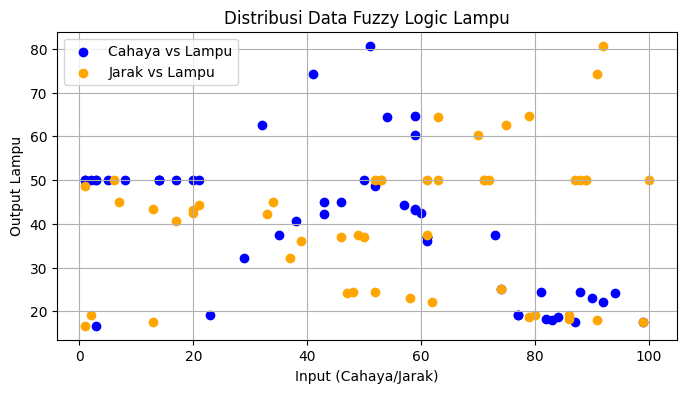

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(df['Cahaya'], df['Intensitas Lampu'], c='blue', label='Cahaya vs Lampu')
plt.scatter(df['Jarak'], df['Intensitas Lampu'], c='orange', label='Jarak vs Lampu')
plt.xlabel('Input (Cahaya/Jarak)')
plt.ylabel('Output Lampu')
plt.legend()
plt.title('Distribusi Data Fuzzy Logic Lampu')
plt.grid(True)
plt.show()

In [7]:
df.to_csv('dataset_fuzzy_lampu.csv', index=False)

with open("requirements.txt", "w") as f:
    f.write("numpy\npandas\nmatplotlib\nscikit-fuzzy\n")